In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.feature_selection import RFECV



In [24]:
# Load the processed data
train_datadt = pd.read_csv('../Data/output/train_data.csv')
test_datadt = pd.read_csv('../Data/output/test_data.csv')
validation_datadt = pd.read_csv('../Data/output/validation_data.csv')


# Assuming that the first column is the index if saved with index=True
train_datadt.set_index(train_datadt.columns[0], inplace=True)
test_datadt.set_index(test_datadt.columns[0], inplace=True)
validation_datadt.set_index(validation_datadt.columns[0], inplace=True)


In [25]:
# Separating target variable and features
y_train = train_datadt['log_return']
X_train = train_datadt.drop(['log_return'], axis=1)

y_test = test_datadt['log_return']
X_test = test_datadt.drop(['log_return'], axis=1)

y_validation = validation_datadt['log_return']
X_validation = validation_datadt.drop(['log_return'], axis=1)



In [26]:
# Initialize the Decision Tree Regressor with a random state for reproducibility
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = decision_tree_model.predict(X_train)

# Predict on the testing data
y_test_pred = decision_tree_model.predict(X_test)

# Predict on the validating data
y_validation_pred = decision_tree_model.predict(X_validation)


In [27]:
# Calculate performance metrics on the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)



In [28]:
# Calculate performance metrics on the testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)



In [29]:
# Calculate performance metrics on the validation data

validation_mse = mean_squared_error(y_validation, y_validation_pred)
validation_mae = mean_absolute_error(y_validation, y_validation_pred)
validation_r2 = r2_score(y_validation, y_validation_pred)


In [55]:
# Display the results

print("Training data")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R2:", train_r2)
print()


print("Testing data")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R2:", test_r2)
print()

print("Validation data")
print("MSE:", validation_mse)
print("MAE:", validation_mae)
print("R2:", validation_r2)

Training data
MSE: 0.0
MAE: 0.0
R2: 1.0

Testing data
MSE: 79695.75400181103
MAE: 198.29891842763152
R2: 0.9528744997997641

Validation data
MSE: 66850.84287926838
MAE: 175.64782020560753
R2: 0.956356329363249


In [30]:
# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Create a time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Initialize RFECV
selector = RFECV(estimator=decision_tree, step=1, cv=tscv, scoring='neg_mean_squared_error')

# Fit RFECV
selector = selector.fit(X_train, y_train)


In [31]:
# Transform the datasets to include only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
X_validation_selected = selector.transform(X_validation)

# Fit the decision tree model on the transformed training data
decision_tree.fit(X_train_selected, y_train)


DecisionTreeRegressor(random_state=42)

In [32]:
# Predict and evaluate the model on the transformed training set
y_train_pred = decision_tree.predict(X_train_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Predict and evaluate the model on the transformed test set
y_test_pred = decision_tree.predict(X_test_selected)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Predict and evaluate the model on the transformed validation set
y_validation_pred = decision_tree.predict(X_validation_selected)
validation_mse = mean_squared_error(y_validation, y_validation_pred)
validation_mae = mean_absolute_error(y_validation, y_validation_pred)
validation_r2 = r2_score(y_validation, y_validation_pred)

# Selected features
selected_features = X_train.columns[selector.support_]


validation_mae = mean_absolute_error(y_validation, y_validation_pred)


In [33]:
# Output results
# Display the results

print("Training data")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R2:", train_r2)
print()


print("Testing data")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R2:", test_r2)
print()

print("Validation data")
print("MSE:", validation_mse)
print("MAE:", validation_mae)
print("R2:", validation_r2)
print()

print("Selected features:", selected_features)

Training data
MSE: 0.0
MAE: 0.0
R2: 1.0

Testing data
MSE: 0.04281471042289411
MAE: 0.08315077024773282
R2: 0.9178255728225885

Validation data
MSE: 0.09461097373038663
MAE: 0.10242411972480603
R2: 0.8837637177603745

Selected features: Index(['Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)', 'Closing_Price_Diff', 'EMA_7', 'EMA_20', 'EMA_100',
       'WMA_7', 'WMA_20', 'WMA_50', '7_day_volatility', '30_day_volatility',
       'BB_upper', 'BB_lower', 'MACD', 'MACD_signal', 'ATR', 'Stoch_k',
       'Stoch_d', 'Ichimoku_Span_A', '14_day_rolling_mean', 'ROC', 'lag_1',
       'lag_2', 'lag_3', 'day_sin', 'day_cos'],
      dtype='object')


In [34]:
# 1. Cross-validation for Model Performance Evaluation
cv_scores = cross_val_score(decision_tree, X_train_selected, y_train, cv=tscv, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)  # Negating the scores because they are negative mean squared errors

# Display the results
print("Cross-validation scores (negative MSE):", cv_scores)
print("Mean CV score (MSE):", mean_cv_score)


Cross-validation scores (negative MSE): [-1.29689441 -2.25904222 -0.39634939 -0.06551857 -0.08942133]
Mean CV score (MSE): 0.8214451833094076


In [35]:
# 2. Hyperparameter Tuning using Grid Search
# Setting a range of parameters for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with the Decision Tree model
grid_search = GridSearchCV(decision_tree, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train_selected, y_train)

# Best parameters and score from Grid Search
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negating the score

In [36]:
# Best parameters and score from Grid Search
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negating the score

# Train the model with the best parameters
best_decision_tree = DecisionTreeRegressor(**best_params, random_state=42)
best_decision_tree.fit(X_train_selected, y_train)



DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

In [37]:
# Predict and evaluate the tuned model
y_tuned_pred = best_decision_tree.predict(X_test_selected)
tuned_mse = mean_squared_error(y_test, y_tuned_pred)
tuned_mae = mean_absolute_error(y_test, y_tuned_pred)
tuned_r2 = r2_score(y_test, y_tuned_pred)

(mean_cv_score, best_params, best_score), (tuned_mse, tuned_r2)

((0.8214451833094076,
  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2},
  0.46740071630296437),
 (0.027417893011034502, 0.9473767396686968))

In [18]:
# Predict and evaluate the tuned model on the validation data
y_validation_tuned_pred = best_decision_tree.predict(X_validation_selected)
validation_tuned_mse = mean_squared_error(y_validation, y_validation_tuned_pred)
validation_tuned_mae = mean_absolute_error(y_validation, y_validation_tuned_pred)
validation_tuned_r2 = r2_score(y_validation, y_validation_tuned_pred)


In [68]:
print("Testing data")
print("MSE:", tuned_mse)
print("MAE:", tuned_mae)
print("R2:", tuned_r2)
print()

print("Validation data")
print("MSE:", validation_tuned_mse)
print("MAE:", validation_tuned_mae)
print("R2:", validation_tuned_r2)
print()

Testing data
MSE: 79695.75400181103
MAE: 198.29891842763152
R2: 0.9528744997997641

Validation data
MSE: 66850.84287926838
MAE: 175.64782020560753
R2: 0.956356329363249



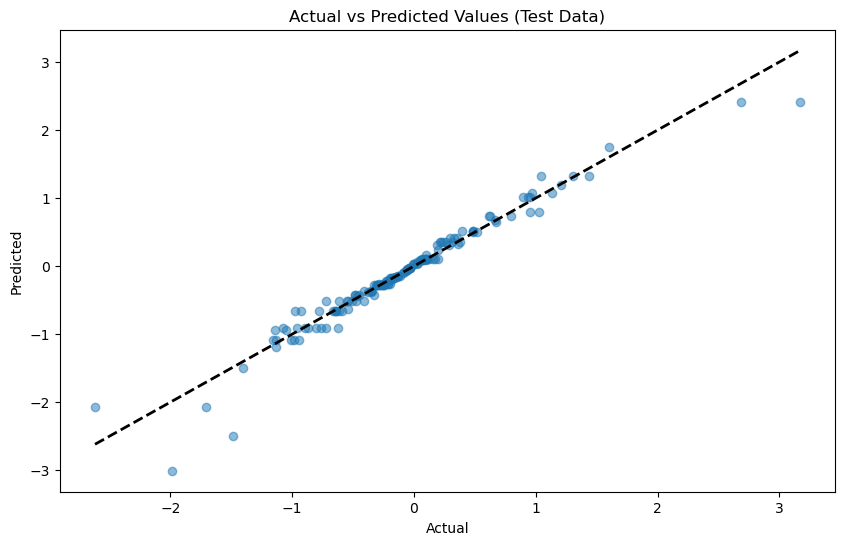

In [19]:
# Plot for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_tuned_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Data)')
plt.show()

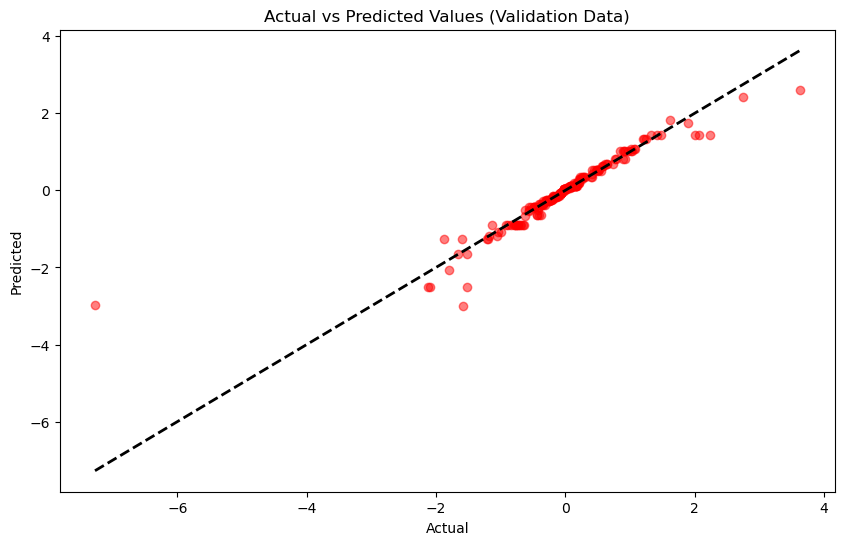

In [20]:
# Plot for Validation Data
plt.figure(figsize=(10, 6))
plt.scatter(y_validation, y_validation_tuned_pred, alpha=0.5, color='r')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Validation Data)')
plt.show()

In [21]:
# Create a DataFrame for Test Data
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_tuned_pred})
# Display first few rows
print("Test Data - Actual vs Predicted:")
print(test_comparison.head())

# Create a DataFrame for Validation Data
validation_comparison = pd.DataFrame({'Actual': y_validation, 'Predicted': y_validation_tuned_pred})
# Display first few rows
print("\nValidation Data - Actual vs Predicted:")
print(validation_comparison.head())


Test Data - Actual vs Predicted:
              Actual  Predicted
Date                           
2020-01-01  1.043489   1.322068
2020-01-02 -0.974149  -0.658445
2020-01-03 -0.639558  -0.658445
2020-01-04 -0.637950  -0.658445
2020-01-05 -0.648225  -0.658445

Validation Data - Actual vs Predicted:
              Actual  Predicted
Date                           
2020-06-01 -0.924157  -0.911810
2020-06-02 -0.081959  -0.081400
2020-06-03  0.405970   0.351318
2020-06-04 -0.212747  -0.207936
2020-06-05 -0.282109  -0.258472


In [22]:
#Saving the model


dump(best_decision_tree, '../Data/models_output/decision_tree_logreturn.joblib')


['../Data/models_output/decision_tree_logreturn.joblib']

###  Decision Tree

The initial model results states that the model achieved perfect scores on the **training dataset** with MSE, MAE, and R^2 being 0, 0, and 1 respectively. Which indicates that the model has perfectly fit the data, however there is also possibility of overfitting. 
On the **testing dataset**, the model exhibited high MSE and MAE values (approximately 79695.75 and 198.29 respectively) but a relatively high R^2 value of 0.9529, suggesting that while the model captures the variance in the data well, it also makes large errors in some predictions.
The **validation dataset** showed similar results to the testing dataset with an MSE of approximately 66850.84, MAE of 175.65, and R^2 of 0.9564.
The model used a variety of features including various moving averages, volatility measures, Bollinger Bands, MACD, ATR, Stochastic Oscillator values, and lag features among others. 

#### Cross-validation Scores: 

Cross-validation was performed with negative MSE scores ranging from approximately -1.30 to -0.06, and the mean CV score for MSE was approximately 0.82. This indicates that the model's performance varied significantly across different folds, suggesting variability in the model's predictive performance.

#### Hyperparameter Tuning

The model was tuned with a maximum depth of 10 and a minimum sample leaf of 4, which likely aimed to prevent overfitting. The resultant model's performance on the validation dataset had an R^2 of approximately 0.9474, showing a good fit.


The **Decision Tree** model seems to overfit the training data but still performs reasonably well on unseen data, capturing a significant proportion of the variance. The high MSE and MAE values on the testing and validation datasets suggest that while the model's general direction of predictions is correct, there are instances where it makes large errors. This may indicate that the model's complexity needs further tuning.